In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('global.csv',encoding=('ISO-8859-1'))

In [3]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
df.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  110
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

In [5]:
df = df.drop('laptop_ID', axis=1)

In [6]:
df.head() # y = df[['Price_euros']]

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


# Preprocessing

In [7]:
df["Weight"] = df["Weight"].str.replace("kg","")
df["Weight"] = pd.to_numeric(df["Weight"])
df["Ram"] = df["Ram"].apply(lambda x : str(x).replace("GB","")).astype(int)

In [8]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float64
 11  Price_euros       1303 non-null   float64
dtypes: float64(3), int32(1), object(8)
memory usage: 117.2+ KB


In [10]:
df_product_price = df.groupby("Company")["Price_euros"].mean()

In [11]:
df_product_price

Company
Acer          626.775825
Apple        1564.198571
Asus         1104.169367
Chuwi         314.296667
Dell         1186.068990
Fujitsu       729.000000
Google       1677.666667
HP           1067.774854
Huawei       1424.000000
LG           2099.000000
Lenovo       1086.384444
MSI          1728.908148
Mediacom      295.000000
Microsoft    1612.308333
Razer        3346.142857
Samsung      1413.444444
Toshiba      1267.812500
Vero          217.425000
Xiaomi       1133.462500
Name: Price_euros, dtype: float64

In [12]:
df_product_price = pd.DataFrame(data = df_product_price)
df_product_price.columns = ["Product Avg Price"]
df_product_price.sort_values(by="Product Avg Price",ascending=False,inplace=True)


Text(0.5, 1.0, 'Average Price Per Company')

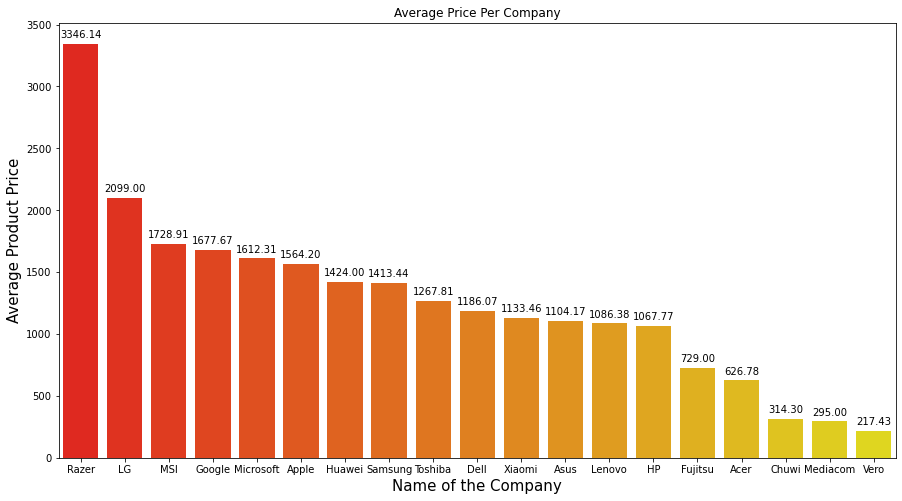

In [13]:
plt.figure(figsize = (15,8))
splot = sns.barplot(data = df_product_price,x= df_product_price.index, y = 'Product Avg Price', palette = 'autumn')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
plt.xlabel("Name of the Company", size=15)
plt.ylabel("Average Product Price", size=15)
plt.title('Average Price Per Company')

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()

In [16]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [17]:
import numpy as np

import warnings as wr
wr.filterwarnings('ignore')

for column in df.columns:
    if df[column].dtype == np.number:
        continue
    df[column] = le.fit_transform(df[column])
        

In [18]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,300,4,13.3,23,65,3,4,58,8,1.37,1339.69
1,1,301,4,13.3,1,63,3,2,51,8,1.34,898.94
2,7,50,3,15.6,8,74,3,16,53,4,1.86,575.00
3,1,300,4,15.4,25,85,5,29,9,8,1.83,2537.45
4,1,300,4,13.3,23,67,3,16,59,8,1.37,1803.60


In [19]:
df1=df.copy()
df2=df.copy()
df3=df.copy()
df4=df.copy()
df5=df.copy()
df6=df.copy()
df7=df.copy()
df8=df.copy()
df9=df.copy()

Text(0.5, 1.0, 'Average Price Per Company')

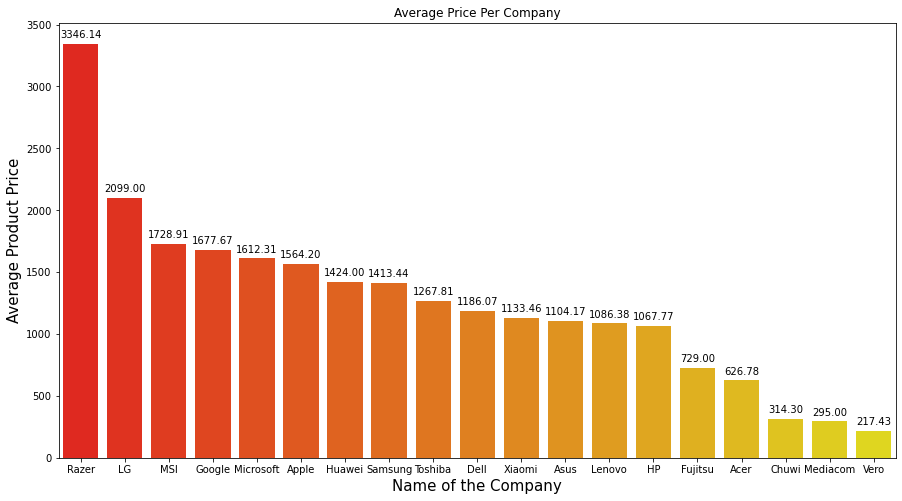

In [20]:
plt.figure(figsize = (15,8))
splot = sns.barplot(data = df_product_price,x= df_product_price.index, y = 'Product Avg Price', palette = 'autumn')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
plt.xlabel("Name of the Company", size=15)
plt.ylabel("Average Product Price", size=15)
plt.title('Average Price Per Company')

<AxesSubplot:xlabel='Ram', ylabel='count'>

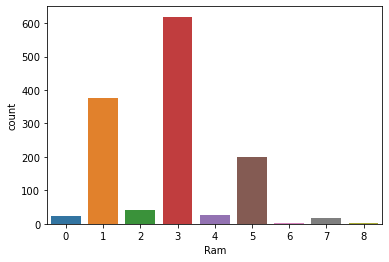

In [21]:
sns.countplot(x='Ram',data=df)

# Linear Regression Model

In [22]:
df1.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,300,4,13.3,23,65,3,4,58,8,1.37,1339.69
1,1,301,4,13.3,1,63,3,2,51,8,1.34,898.94
2,7,50,3,15.6,8,74,3,16,53,4,1.86,575.00
3,1,300,4,15.4,25,85,5,29,9,8,1.83,2537.45
4,1,300,4,13.3,23,67,3,16,59,8,1.37,1803.60


In [23]:
x = df1.drop('Price_euros', axis=1) 
y = df1['Price_euros']

In [24]:
x.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,1,300,4,13.3,23,65,3,4,58,8,1.37
1,1,301,4,13.3,1,63,3,2,51,8,1.34
2,7,50,3,15.6,8,74,3,16,53,4,1.86
3,1,300,4,15.4,25,85,5,29,9,8,1.83
4,1,300,4,13.3,23,67,3,16,59,8,1.37


In [25]:
y.head()

0    1339.69
1     898.94
2     575.00
3    2537.45
4    1803.60
Name: Price_euros, dtype: float64

In [26]:
from sklearn.model_selection import train_test_split as tts

In [27]:
xtrain , xtest , ytrain, ytest = tts(x,y,train_size=.70,random_state=1)

In [28]:
xtrain.shape

(912, 11)

In [29]:
xtest.shape

(391, 11)

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lr = LinearRegression()

In [32]:
lr.fit(xtrain ,ytrain) 

LinearRegression()

In [33]:
testing=lr.predict(xtest)
testing

array([ 541.89766812, 1262.98315054, 1964.06076218, 1301.44553419,
       1369.7073389 , 1189.84724418, 1186.83577332,  561.44237972,
        201.78536606, 1358.01768149, 1285.94779405, 1105.70536949,
       1376.49687969, 1468.90548545, 1246.23024659, 1669.60342669,
        908.3418552 , 1185.97312768, 1161.41140792,  567.49066316,
       1007.01255777,  506.67277568, 1944.90433211, 1408.67247315,
        517.83454323, 1607.78790139,  507.33807111, 1217.95432049,
       1261.12090783, 1376.75647222, 2203.73494596,  640.88947821,
       1276.45179462, 1459.56928876, 2050.2374545 ,  495.19888075,
        792.70116041,  540.37099829,  208.68015659, 1306.38382584,
       1119.31945752,  692.31136463,  586.86354874,  693.62548981,
       1316.0348302 ,  432.28298481,  667.06406013, 1956.82998177,
       1312.11806225, 1982.83636892, 1131.51289762, 1327.29949299,
       1874.36798949, 1354.92597707, 1219.8406169 , 1131.36674545,
       1889.40439587, 1206.26245511, 1131.2627901 ,  714.75607

In [34]:
from sklearn.metrics import mean_squared_error # mse
pred = lr.predict(xtest)
mse = mean_squared_error(ytest , pred)
mse

178370.9207892119

In [35]:
from sklearn.metrics import mean_absolute_error 
pred = lr.predict(xtest)
mae = mean_absolute_error(ytest , pred)
mae

303.00091520018753

In [36]:
lr.score(x,y)

0.6528438584065817

In [37]:
lr.score(xtrain,ytrain)

0.651871389527392

In [38]:
lr.score(xtest,ytest)

0.6544181565449348

In [39]:
from sklearn import metrics
r_square = metrics.r2_score(ytest, pred)
print('R-Square Error:', r_square)

R-Square Error: 0.6544181565449348


# Decision Tree Regression

In [40]:
df2.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,300,4,13.3,23,65,3,4,58,8,1.37,1339.69
1,1,301,4,13.3,1,63,3,2,51,8,1.34,898.94
2,7,50,3,15.6,8,74,3,16,53,4,1.86,575.00
3,1,300,4,15.4,25,85,5,29,9,8,1.83,2537.45
4,1,300,4,13.3,23,67,3,16,59,8,1.37,1803.60


In [41]:
x = df2.drop('Price_euros', axis=1) 
y = df2['Price_euros']

In [42]:
xtrain , xtest , ytrain, ytest = tts(x,y,train_size=.70,random_state=1)

In [43]:
from sklearn.tree import DecisionTreeRegressor

In [44]:
regressor = DecisionTreeRegressor(random_state = 0) 

In [45]:
regressor.fit(xtrain,ytrain)

DecisionTreeRegressor(random_state=0)

In [46]:
dreg=regressor.predict(xtest)
dreg

array([ 410.8 ,  729.  , 1349.  , 1010.51, 2499.  , 1045.  , 1389.  ,
        799.  ,  289.  , 1390.  , 1469.  ,  979.  , 2330.  , 1869.  ,
        839.  , 1749.  , 1149.  , 1803.6 , 1187.  , 1000.  ,  728.  ,
        639.  , 1468.  , 1268.  ,  659.  , 1396.  ,  540.  ,  459.  ,
       1672.  , 1099.  , 2699.  ,  540.  , 1364.  ,  943.  , 2449.  ,
        499.  ,  805.99,  499.  ,  359.  , 1186.  ,  941.  ,  468.  ,
        800.  ,  915.  , 1449.9 ,  488.69, 1195.  , 1499.  , 1199.  ,
       1869.  , 1199.  , 1149.  , 1799.  , 1099.  , 1949.  , 1199.  ,
       1948.99, 1099.  ,  999.  ,  722.  , 2325.  , 2046.  , 2419.  ,
       4389.  ,  616.  , 2041.  ,  459.  ,  265.  , 3072.89, 2014.  ,
        895.01, 1479.  , 1670.  , 1499.  , 3240.  , 1210.  ,  889.  ,
        800.  , 1579.  , 1294.  ,  364.9 ,  735.  ,  889.  ,  880.  ,
        659.  , 2299.  , 1975.  , 2399.  ,  709.  ,  258.  , 1873.  ,
        669.  ,  896.  ,  819.  ,  684.8 , 2240.  ,  597.57,  553.  ,
        397.  , 1103

In [47]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest , dreg)
mse

129061.26739360613

In [48]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(ytest , dreg)
mae

214.2797186700767

In [49]:
from sklearn import metrics
r_square_dreg = metrics.r2_score(ytest, dreg)
print('R-Square Error:', r_square_dreg)

R-Square Error: 0.7499523436489036


# Random Forest Regression

In [50]:
df3.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,300,4,13.3,23,65,3,4,58,8,1.37,1339.69
1,1,301,4,13.3,1,63,3,2,51,8,1.34,898.94
2,7,50,3,15.6,8,74,3,16,53,4,1.86,575.00
3,1,300,4,15.4,25,85,5,29,9,8,1.83,2537.45
4,1,300,4,13.3,23,67,3,16,59,8,1.37,1803.60


In [51]:
x = df3.drop('Price_euros', axis=1) 
y = df3['Price_euros']

In [52]:
xtrain , xtest , ytrain, ytest = tts(x,y,train_size=.70,random_state=1)

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
RFReg = RandomForestRegressor()
RFReg

RandomForestRegressor()

In [55]:
RFReg.fit(xtrain, ytrain)

RandomForestRegressor()

In [56]:
RFpredict=RFReg.predict(xtest)

In [57]:
from sklearn import metrics
r_square_RFReg = metrics.r2_score(ytest, RFpredict)
print('R-Square Error:', r_square_RFReg)

R-Square Error: 0.8683252932039578


In [58]:
RFReg.score(x,y)

0.9401124387918516

# Random Forest With Hyperparameter Tuning

In [59]:
df4.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,300,4,13.3,23,65,3,4,58,8,1.37,1339.69
1,1,301,4,13.3,1,63,3,2,51,8,1.34,898.94
2,7,50,3,15.6,8,74,3,16,53,4,1.86,575.00
3,1,300,4,15.4,25,85,5,29,9,8,1.83,2537.45
4,1,300,4,13.3,23,67,3,16,59,8,1.37,1803.60


In [60]:
x = df4.drop('Price_euros', axis=1) 
y = df4['Price_euros']

In [61]:
xtrain , xtest , ytrain, ytest = tts(x,y,train_size=.70,random_state=1)

In [62]:
from sklearn.ensemble import RandomForestRegressor

In [63]:
RFRegH = RandomForestRegressor(n_estimators = 30, random_state = 0)

In [64]:
RFRegH

RandomForestRegressor(n_estimators=30, random_state=0)

In [65]:
RFRegH.fit(xtrain,ytrain)

RandomForestRegressor(n_estimators=30, random_state=0)

In [66]:
RFRegH_predict=RFRegH.predict(xtest)

In [67]:
from sklearn import metrics
r_square_RFRegH = metrics.r2_score(ytest, RFRegH_predict)
print('R-Square Error:', r_square_RFRegH)

R-Square Error: 0.8713624800780333


In [68]:
RFRegH.score(x,y)

0.9416112799422085

# KNN regression

In [69]:
df5.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,300,4,13.3,23,65,3,4,58,8,1.37,1339.69
1,1,301,4,13.3,1,63,3,2,51,8,1.34,898.94
2,7,50,3,15.6,8,74,3,16,53,4,1.86,575.00
3,1,300,4,15.4,25,85,5,29,9,8,1.83,2537.45
4,1,300,4,13.3,23,67,3,16,59,8,1.37,1803.60


In [70]:
x = df5.drop('Price_euros', axis=1) 
y = df5['Price_euros']

In [71]:
xtrain , xtest , ytrain, ytest = tts(x,y,train_size=.70,random_state=1)

In [72]:
from sklearn.neighbors import KNeighborsRegressor

In [73]:
neigh = KNeighborsRegressor()

In [74]:
neigh.fit(xtrain, ytrain)

KNeighborsRegressor()

In [75]:
KNNpredict=neigh.predict(xtest)

In [76]:
from sklearn import metrics
r_square_KNN = metrics.r2_score(ytest, KNNpredict)
print('R-Square Error:', r_square_KNN)

R-Square Error: 0.7021412658040109


In [77]:
neigh.score(xtrain, ytrain)

0.7785389300687251

In [78]:
neigh.score(x, y)

0.7544080350644364

In [79]:
neigh.score(xtest,ytest)

0.7021412658040109

# KNN regression with tuning

In [80]:
n_neighbors= np.random.randint(5,25,5)
weights= ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size= np.random.randint(5,50,5)
p= [1,2]

In [81]:
ids= {
    'n_neighbors':n_neighbors,
    'weights':weights,
    'algorithm':algorithm,
    'leaf_size':leaf_size,
    'p':p
}

In [82]:
from sklearn.model_selection import RandomizedSearchCV

In [83]:
rcv= RandomizedSearchCV(neigh, ids, n_iter = 200, cv=3)

In [84]:
df6.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,300,4,13.3,23,65,3,4,58,8,1.37,1339.69
1,1,301,4,13.3,1,63,3,2,51,8,1.34,898.94
2,7,50,3,15.6,8,74,3,16,53,4,1.86,575.00
3,1,300,4,15.4,25,85,5,29,9,8,1.83,2537.45
4,1,300,4,13.3,23,67,3,16,59,8,1.37,1803.60


In [85]:
x = df6.drop('Price_euros', axis=1) 
y = df6['Price_euros']

In [86]:
xtrain , xtest , ytrain, ytest = tts(x,y,train_size=.70,random_state=1)

In [87]:
rcv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=3, estimator=KNeighborsRegressor(), n_iter=200,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': array([26,  5, 26, 45,  8]),
                                        'n_neighbors': array([18, 10, 12, 21,  9]),
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']})

In [88]:
rcv.cv_results_

{'mean_fit_time': array([0.        , 0.        , 0.00467038, 0.00520786, 0.00233555,
        0.        , 0.00520738, 0.        , 0.00520738, 0.00517003,
        0.        , 0.01041436, 0.        , 0.        , 0.01041667,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.0052073 , 0.        , 0.        , 0.        ,
        0.01041309, 0.00520714, 0.0052073 , 0.00520698, 0.01110951,
        0.01041619, 0.00521024, 0.00317264, 0.0104146 , 0.        ,
        0.01308926, 0.00671347, 0.00520762, 0.00350467, 0.0052073 ,
        0.00554554, 0.00521183, 0.        , 0.0052073 , 0.        ,
        0.0052073 , 0.01258198, 0.00520698, 0.00416986, 0.0052096 ,
        0.00904687, 0.        , 0.01041516, 0.01041635, 0.00521008,
        0.00871181, 0.        , 0.01054867, 0.01041659, 0.        ,
        0.01041563, 0.00522335, 0.00520817, 0.00520611, 0.        ,
        0.00520539, 0.0052073 , 0.00622455, 0.        , 0.01562373,
        0.00587813, 0.00520953,

In [89]:
cv_result = pd.DataFrame(rcv.cv_results_)
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_p,param_n_neighbors,param_leaf_size,param_algorithm,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000000,0.000000,0.005193,0.007345,distance,2,21,8,kd_tree,"{'weights': 'distance', 'p': 2, 'n_neighbors':...",0.584431,0.662845,0.574902,0.607393,0.039403,142
1,0.000000,0.000000,0.005207,0.007364,uniform,1,10,26,kd_tree,"{'weights': 'uniform', 'p': 1, 'n_neighbors': ...",0.654684,0.723132,0.627953,0.668589,0.040081,61
2,0.004670,0.006605,0.115647,0.020436,uniform,2,21,5,brute,"{'weights': 'uniform', 'p': 2, 'n_neighbors': ...",0.497789,0.547045,0.490190,0.511674,0.025202,182
3,0.005208,0.007365,0.010414,0.007364,distance,2,10,45,auto,"{'weights': 'distance', 'p': 2, 'n_neighbors':...",0.631120,0.689815,0.618137,0.646357,0.031183,98
4,0.002336,0.003303,0.003002,0.004245,uniform,2,10,8,kd_tree,"{'weights': 'uniform', 'p': 2, 'n_neighbors': ...",0.556158,0.588988,0.547464,0.564203,0.017881,168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.000000,0.000000,0.088943,0.007299,uniform,1,10,5,brute,"{'weights': 'uniform', 'p': 1, 'n_neighbors': ...",0.654629,0.723096,0.627955,0.668560,0.040071,64
196,0.000000,0.000000,0.010417,0.007366,distance,2,18,5,auto,"{'weights': 'distance', 'p': 2, 'n_neighbors':...",0.579424,0.665246,0.583079,0.609250,0.039623,133
197,0.000000,0.000000,0.010414,0.007364,distance,1,21,8,auto,"{'weights': 'distance', 'p': 1, 'n_neighbors':...",0.672638,0.741147,0.634100,0.682628,0.044269,34
198,0.005207,0.007364,0.141269,0.000188,distance,2,12,8,brute,"{'weights': 'distance', 'p': 2, 'n_neighbors':...",0.620201,0.689729,0.616222,0.642050,0.033753,104


In [90]:
rcv.best_score_

0.7347480244978831

In [91]:
rcv.best_params_

{'weights': 'distance',
 'p': 1,
 'n_neighbors': 9,
 'leaf_size': 45,
 'algorithm': 'ball_tree'}

In [92]:
knn= rcv.best_estimator_
knn

KNeighborsRegressor(algorithm='ball_tree', leaf_size=45, n_neighbors=9, p=1,
                    weights='distance')

In [93]:
knn.fit(xtrain, ytrain)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=45, n_neighbors=9, p=1,
                    weights='distance')

In [94]:
knn.score(xtrain,ytrain)

0.9997730388569922

In [95]:
knnTpredict=knn.predict(xtest)

In [96]:
from sklearn import metrics
r_square_KNNT = metrics.r2_score(ytest, knnTpredict)
print('R-Square Error:', r_square_KNNT)

R-Square Error: 0.7816834538283188


In [97]:
knn.score(x,y)

0.9305887350128512

In [98]:
df7.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,300,4,13.3,23,65,3,4,58,8,1.37,1339.69
1,1,301,4,13.3,1,63,3,2,51,8,1.34,898.94
2,7,50,3,15.6,8,74,3,16,53,4,1.86,575.00
3,1,300,4,15.4,25,85,5,29,9,8,1.83,2537.45
4,1,300,4,13.3,23,67,3,16,59,8,1.37,1803.60


In [99]:
x = df7.drop('Price_euros', axis=1) 
y = df7['Price_euros']

In [100]:
xtrain , xtest , ytrain, ytest = tts(x,y,train_size=.70,random_state=1)

In [101]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

In [102]:
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.3))

In [103]:
regr.fit(xtrain,ytrain)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.3))])

In [104]:
ypred=regr.predict(xtest)

In [105]:
from sklearn import metrics
r_square_SVR = metrics.r2_score(ytest, ypred)
print('R-Square Error:', r_square_SVR)

R-Square Error: 0.006273203800436611


In [106]:
regr.score(x,y)

0.02414138305424074

In [107]:
regr.score(xtrain,ytrain)

0.031772981119704835

In [108]:
regr.score(xtest,ytest)

0.006273203800436611